In [ ]:
# %pip install numpy
# %pip install matplotlib
# %pip install scipy

In [2]:
## Solving Exponential Decay ODE with scipy

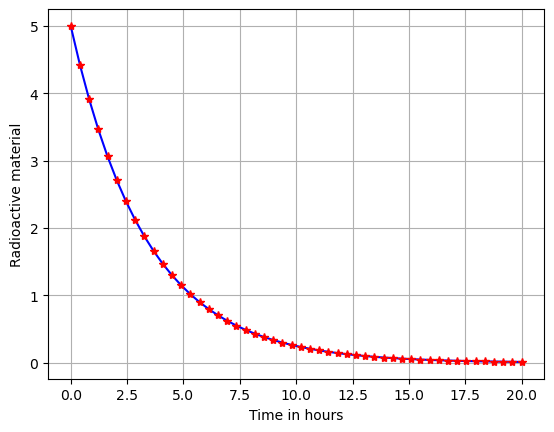

In [67]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Defining a function that returns derivative values at requested y and t values
def FODE(y,t):
    l=0.3
    dydt = -l*y
    return dydt

# Initial condition
y_init = 5

# Time points
t_values = np.linspace(0,20)
# Solving the ODE where odeint requires the model function, the initial conditions of the differential states and the time values at which the solution should be given
y_values = odeint(FODE, y_init, t_values)


# Plotting the results
plt.plot(t_values,y_values, 'b')
plt.plot(t_values, y_values, 'r*')
plt.xlabel('Time in hours')
plt.ylabel('Radioactive material')
plt.grid()
plt.show()

In [ ]:
## Solving Exponential Decay ODE with sympy

In [143]:
import sympy as sym

# Define all symbols to be used
t, l, y0 = sym.symbols('t lambda, y0', real=True)

# Define the variable we want to solve for
y = sym.Function('y', real=True)
# y = sym.symbols('y', real=True, cls=sym.Function)

# Define the equation to solve for
dydt = y(t).diff(t)
expr_decay = sym.Eq(dydt, -l*y(t))

# Solve the equation
sol_decay = sym.dsolve(expr_decay, y(t))
sol_decay

Eq(y(t), C1*exp(-lambda*t))

In [162]:
# Specifying the initial conditions, e.g. y=2
init_decay_conditions = {y(0): 5}
sol_decay_2 = sym.dsolve(expr_decay, y(t), ics=init_decay_conditions)
sol_decay_2

Eq(y(t), 5*exp(-lambda*t))

In [163]:
# Assuming lambda=2, 
sol_decay_complete = sol_decay_2.subs({l:0.3})
sol_decay_complete

Eq(y(t), 5*exp(-0.3*t))

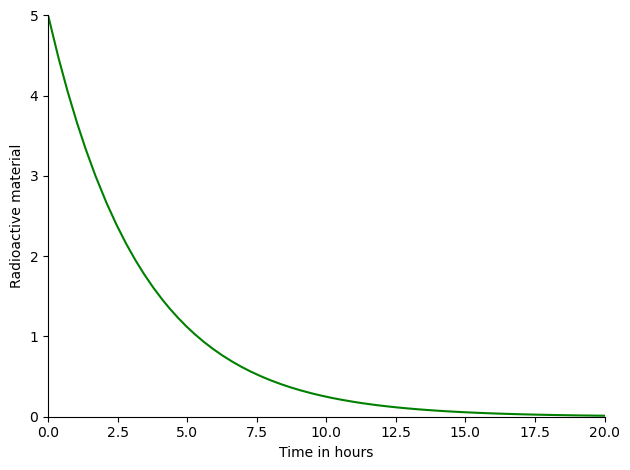

In [177]:
# Plotting symbolic functions
from sympy import plot
plot(sol_decay_complete.rhs, (t,0,20), line_color='g', xlabel='Time in hours', ylabel='Radioactive material', xlim=(0,20), ylim=(0,5), axis_center=(0,0), grid=True, show=True)

In [127]:
from sympy import *

m = 2
g = 9.8
k = 0.5
f = Function('f')
f1 = g * m
t = Symbol('t')
v = Function('v')
display(f1 - k * v(t) - m * Derivative(v(t)))
equation = dsolve(f1 - k * v(t) - m * Derivative(v(t)), 0)
display(equation)
C1 = Symbol('C1')
display(solve(equation.rhs.subs({t:0}),C1))
C1_ic = solve(equation.rhs.subs({t:0}),C1)[0]
display(C1_ic)
equation.subs({C1:C1_ic})

-0.5*v(t) - 2*Derivative(v(t), t) + 19.6

Eq(v(t), C1*exp(-0.25*t) + 39.2)

[-39.2000000000000]

-39.2000000000000

Eq(v(t), 39.2 - 39.2*exp(-0.25*t))

In [36]:
from sympy import symbols, Eq, Function, dsolve
f, g = symbols("f g", cls=Function)
x = symbols("x")
eqs = [Eq(f(x).diff(x), g(x)), Eq(g(x).diff(x), f(x))]
display(eqs[0])
display(eqs[1])

sol = dsolve(eqs, [f(x), g(x)])
solution = dsolve(eqs, [f(x), g(x)], ics={f(0): 1, g(2): 3})

display(sol[0])
display(sol[1])

display(solution[0])
display(solution[1])

Eq(Derivative(f(x), x), g(x))

Eq(Derivative(g(x), x), f(x))

Eq(f(x), -C1*exp(-x) + C2*exp(x))

Eq(g(x), C1*exp(-x) + C2*exp(x))

Eq(f(x), (1 + 3*exp(2))*exp(x)/(1 + exp(4)) - (-exp(4) + 3*exp(2))*exp(-x)/(1 + exp(4)))

Eq(g(x), (1 + 3*exp(2))*exp(x)/(1 + exp(4)) + (-exp(4) + 3*exp(2))*exp(-x)/(1 + exp(4)))

In [71]:
eqn = Eq(f(x).diff(x), f(x))
display(eqn)
solution2 = dsolve(eqn, f(x))
display(solution2)
dsolve(eqn, f(x), ics={f(x).diff(x).subs(x, 1): 2})

Eq(Derivative(f(x), x), f(x))

Eq(f(x), C1*exp(x))

Eq(f(x), 2*exp(-1)*exp(x))

In [72]:
display(f(x).diff(x).subs(x, 1))

Subs(Derivative(f(x), x), x, 1)

In [ ]:
## Solving coupled linear ODEs

In [2]:
import sympy as sym

V, I = sym.symbols("V I", cls=sym.Function)
RC, t, C, Vs, L, R1, V0, I0 = sym.symbols("RC t C Vs L R1 V0 I0")

system = [sym.Eq(V(t).diff(t), -1/RC*V(t) + I(t)/C), sym.Eq(I(t).diff(t), -R1/L*I(t) - 1/L*V(t) + Vs/L)]
display(system[0])
display(system[1])

Eq(Derivative(V(t), t), -V(t)/RC + I(t)/C)

Eq(Derivative(I(t), t), -R1*I(t)/L + Vs/L - V(t)/L)

In [3]:
init_conditions = {V(0): V0, I(0): I0}
sol_system = sym.dsolve(system, [V(t), I(t)], ics=init_conditions)
sol_system

[Eq(V(t), -4*L*RC**3*Vs*Piecewise((2*C*L*RC*exp(t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2))), Ne(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2)), 0)), (t, True))*exp(-t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/((C*(L - R1*RC) + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - L*(4*RC**2 + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) + R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))) + 2*RC*Vs*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - L*(2*RC**2 + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) + R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))*Piecewise((2*C*L*RC*exp(t*(C*L**2*RC + C*L*R1*RC**2 + L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2

In [5]:
display(sol_system[0])
display(sol_system[1])

Eq(V(t), -4*L*RC**3*Vs*Piecewise((2*C*L*RC*exp(t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2))), Ne(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2)), 0)), (t, True))*exp(-t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/((C*(L - R1*RC) + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - L*(4*RC**2 + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) + R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))) + 2*RC*Vs*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - L*(2*RC**2 + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) + R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)))*Piecewise((2*C*L*RC*exp(t*(C*L**2*RC + C*L*R1*RC**2 + L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*

Eq(I(t), -2*RC**2*Vs*Piecewise((2*C*L*RC*exp(t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2))), Ne(C*L + C*R1*RC - sqrt(C*(C*L**2 - 2*C*L*R1*RC + C*R1**2*RC**2 - 4*L*RC**2)), 0)), (t, True))*exp(-t*(C*L**2*RC + C*L*R1*RC**2 - L*RC*sqrt(C**2*L**2 - 2*C**2*L*R1*RC + C**2*R1**2*RC**2 - 4*C*L*RC**2))/(2*C*L**2*RC**2))/(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - L*(4*RC**2 + sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) + R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2))) - (-I0*(C**2*(L**4 - 4*L**3*R1*RC + 6*L**2*R1**2*RC**2 - 4*L*R1**3*RC**3 + R1**4*RC**4) - C*(4*L**3*RC**2 + L**3*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)) - 8*L**2*R1*RC**3 - 3*L**2*R1*RC*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)) + 4*L*R1**2*RC**4 + 3*L*R1**2*RC**2*sqrt(C*(C*(L**2 - 2*L*R1*RC + R1**2*RC**2) - 4*L*RC**2)) - R1**3*R

In [ ]:
from sympy import Function, Eq, sin, dsolve
# This module exports all latin and greek letters as Symbols
from sympy.abc import t, g, L

theta = Function('theta')(t)
ddtheta = theta.diff(t).diff(t)
SODE = Eq(ddtheta, -(g/L)*sin(theta))
dsolve(SODE)